In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from master import graph, transform, style, correlation, imbalance, outlier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kaggle_diabetes.csv')
# taking a copy of dataframe for future needs
data = df.copy() 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
# Separating indepedent & dependent features
x = df.drop('Outcome', axis=1).copy()
y = df.Outcome.copy()

## <font color='red'>Skewness</font>

In [4]:
skew = transform.skewness(x)
skew

Pregnancies                 0.981629
BloodPressure              -1.853085
Insulin                     1.994587
DiabetesPedigreeFunction    1.810620
Age                         1.180381
dtype: float64

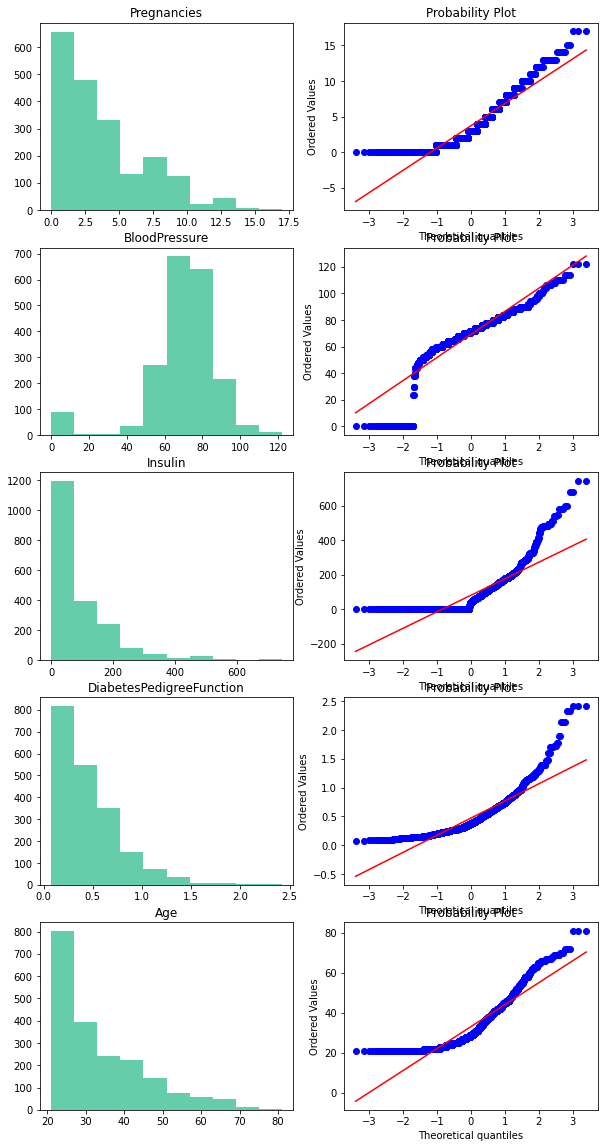

In [5]:
graph.plot_QQ(x, skew.index, bins=10, color=style.color_blue()[0])

In [6]:
x_log = x.copy()
x_log = transform.apply_log(x_log, skew.index)

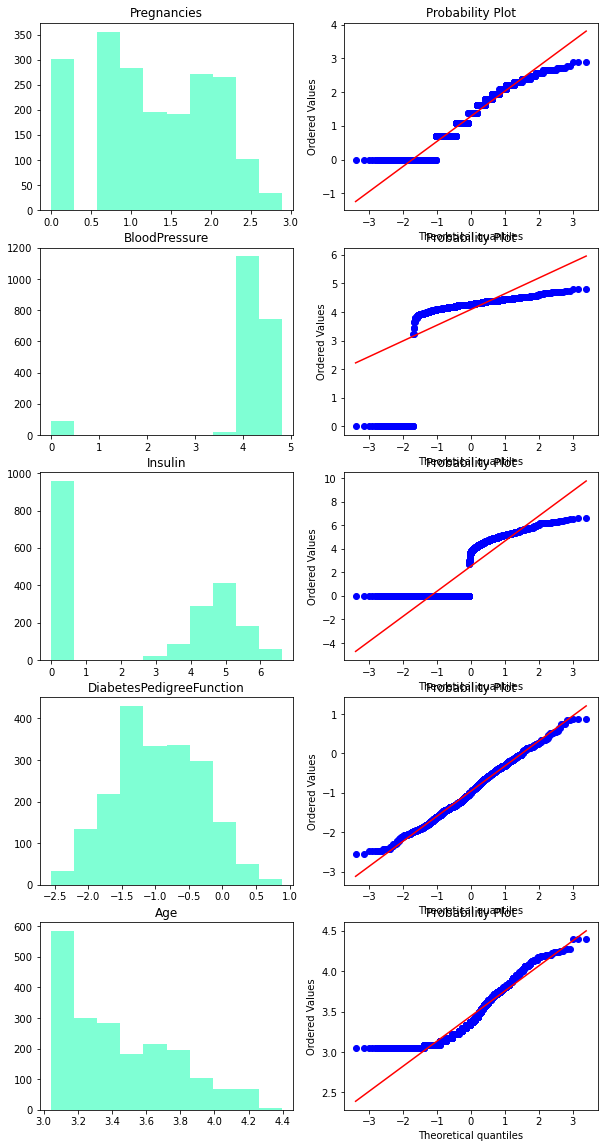

In [7]:
graph.plot_QQ(x_log, skew.index, bins=10, color=style.color_blue()[1])

In [8]:
print(skew)
print('>>><<<'.center(30, '-'))
print(transform.skewness(x_log))

Pregnancies                 0.981629
BloodPressure              -1.853085
Insulin                     1.994587
DiabetesPedigreeFunction    1.810620
Age                         1.180381
dtype: float64
------------>>><<<------------
BloodPressure   -4.145429
dtype: float64


Log Transformation is working fine for all columns except BloodPressure. Let's transform all columns using log transformation.

In [9]:
skew.index

Index(['Pregnancies', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction',
       'Age'],
      dtype='object')

In [10]:
x = transform.apply_log(x, ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction','Age'])

In [11]:
# Lets apply Reciprocal transformation for BloodPressure
x_reci = x.copy()
x_reci = transform.apply_reciprocal(x_reci, ['BloodPressure'])
print(transform.skewness(x_reci))

BloodPressure    4.388546
dtype: float64


In [12]:
# Lets apply sqrt transformation for BloodPressure
x_sqrt = x.copy()
x_sqrt = transform.apply_sqrt(x_sqrt, ['BloodPressure'])
print(transform.skewness(x_sqrt))

BloodPressure   -3.428612
dtype: float64


In [13]:
# Lets apply sqrt transformation for BloodPressure
x_sqrt = x.copy()
x_sqrt = transform.apply_sqrt(x_sqrt, ['BloodPressure'])
print(transform.skewness(x_sqrt))

BloodPressure   -3.428612
dtype: float64


As no transformation is able to improve the distribution of BloodPressure, let's keep it as it is.

## <font color='red'>Outliers</font>

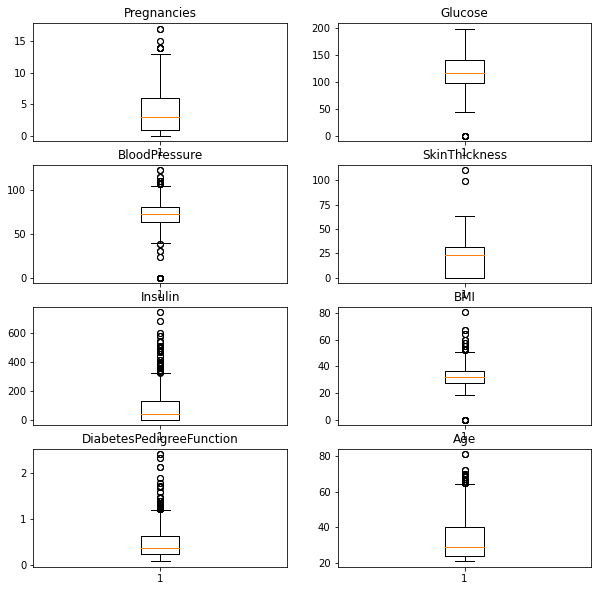

In [14]:
graph.plot_box(df, x.columns)

In [15]:
x = outlier.apply_3std(x, x.columns)

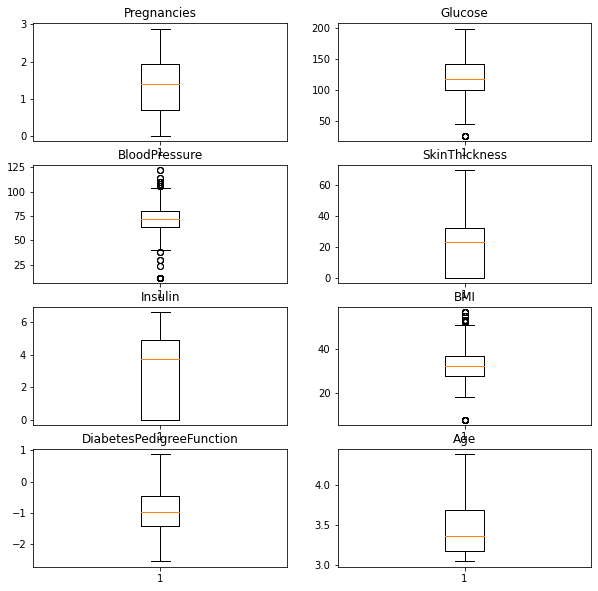

In [16]:
graph.plot_box(x, x.columns)

In [17]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x = pd.DataFrame(scalar.fit_transform(x), columns=x.columns)

In [18]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.239580,0.528651,-0.441381,0.894329,-1.024037,0.179171,-1.731629,1.258507
1,-1.676951,-1.185363,0.710054,0.641256,0.944704,0.789176,-0.781667,-0.955768
2,-1.676951,0.750838,-3.344118,-1.320060,-1.024037,1.584834,0.775403,-0.030920
3,-1.676951,0.433428,-0.095951,1.337207,1.225250,1.332875,-0.079025,-0.823902
4,-0.770071,0.560392,-0.441381,1.273938,1.490019,1.120700,0.522458,-1.237634


## <font color='red'>Imbalanced Dataset</font>

In [19]:
# Our dataset is imbalanced
y.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [20]:
# We'll use Smotetomek to balance our dataset

x, y = imbalance.apply_smotetomek(x, y)

In [21]:
# Our dataset is balanced now

y.value_counts()

1    1316
0    1316
Name: Outcome, dtype: int64

In [22]:
# Let's concate our dependent & Independent features

df = pd.concat([x, y], axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.239580,0.528651,-0.441381,0.894329,-1.024037,0.179171,-1.731629,1.258507,1
1,-1.676951,-1.185363,0.710054,0.641256,0.944704,0.789176,-0.781667,-0.955768,0
2,-1.676951,0.750838,-3.344118,-1.320060,-1.024037,1.584834,0.775403,-0.030920,1
3,-1.676951,0.433428,-0.095951,1.337207,1.225250,1.332875,-0.079025,-0.823902,1
4,-0.770071,0.560392,-0.441381,1.273938,1.490019,1.120700,0.522458,-1.237634,0


In [24]:
# Let's save our dataset

df.to_csv('new_dataframe.csv', index=None)